
Assuming transmission line along $x=0$ to $x=L$  
## Ricatti Differential Equation  
Ricatti equation in terms of $\epsilon(x)$ and $\Gamma(x)$  
$$\Gamma_\omega'(x)-j\omega\epsilon(x)\Gamma_\omega(x)-\frac{\epsilon'(x)}{2\epsilon(x)}(1-\Gamma_\omega^2(x))=0$$

The given formula can be approximated a Fourier Transform relation between reflection coeff at the start and epsilon along the line  
For small $\Gamma(x)$, we approximate the Ricatti as
$$\Gamma'_\omega(x)-j\omega\epsilon(x)\Gamma_\omega(x)-\frac{\epsilon'(x)}{2\epsilon(x)}=0$$

Asumme matched line at load, $\Gamma(\omega, L) =0$. The Ricatti solution at $x=0$ is given by

$$\Gamma_\omega(0) = -\int_0^L\frac{\epsilon'(x)}{2\epsilon(x)}exp\left[-j\omega\int_0^x\epsilon(u)du\right]dx$$

Let $y(x) = \int_0^x\epsilon(u)du$. Then we have  
$$\Gamma_w(0)=-\int_0^L\frac{\epsilon'(x)}{2\epsilon^2(x)}e^{-j\omega y}dx$$  
$$\Gamma_w(0)=-\int_0^{y_L}\frac{\epsilon'(x(y))}{2\epsilon^2(x(y))}e^{-j\omega y}dy$$  


Denote 
$$\phi(y)=-\frac{\epsilon'(x(y))}{2\epsilon^2(x(y))}$$  


We have the following fourier transform pair  
$$\Gamma_\omega(0)\leftrightarrow \phi(y)$$  


DE for $\epsilon(x)$  
$$-\frac{\epsilon'(x)}{2\epsilon^2(x)}=\phi\left(\int_0^x\epsilon(x)dx\right)$$  
Substitute $y=\int_0^x\epsilon(u)du$  
$$-\frac{y''}{2y'^2}=\phi(y)$$  
$y(0)=0$, $y'(0)=\epsilon(0)$

# Required Functions

In [345]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import constants, integrate, signal
from scipy.integrate import odeint
import scipy.fft
import skrf as rf
import pandas as pd

In [346]:
L = 200e-6
eps0 = constants.epsilon_0
mu0 = constants.mu_0

In [347]:
%config InlineBackend.figure_format = 'svg'

In [348]:
def plot_resp_logy(x, y, title_name): # prints the freq response with dB on y axis
    plt.subplot(2, 1, 1)
    plt.semilogx(x, 20 * np.log10(abs(y)))
    plt.title(title_name)
    plt.ylabel('Magnitude (dB)')
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogx(x, np.angle(y))
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (rad)')
    plt.grid()

def plot_resp(x, y, title_name): # prints the freq response with dB on y axis
    plt.subplot(2, 1, 1)
    plt.semilogx(x, abs(y))
    plt.title(title_name)
    plt.ylabel('Magnitude (linear)')
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogx(x, np.angle(y))
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (rad)')
    plt.grid()

def plot_real_imag(x, y, title_name):
    plt.subplot(2, 1, 1)
    plt.plot(x, abs(y))
    plt.title(title_name)
    plt.ylabel('$abs(\phi(y))$')
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.plot(x, np.angle(y))
    plt.ylabel('$rad(\phi(y))$')
    plt.grid()

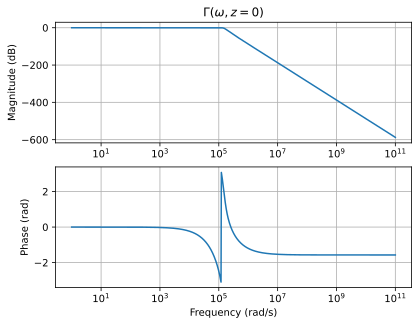

In [349]:
# ----------------------- Define filter parameters -----------------------
order = 5
cutoff_freq = 1e5
ripple = 1e-3
b, a = signal.cheby1(order, ripple, cutoff_freq, 'low', analog=True)
Gamma0 = signal.TransferFunction(b, a)
w = np.logspace(0, 11, num=1000)
w, Gamma0 = signal.freqresp(Gamma0, w)
plot_resp_logy(w, Gamma0, '$\Gamma(\omega, z=0)$')

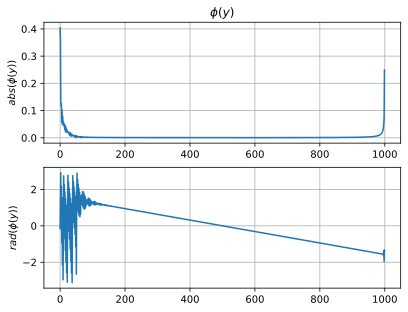

In [350]:
phiy = scipy.fft.ifft(Gamma0)
y = np.arange(1000)
plot_real_imag(y, phiy, "$\phi(y)$")

$$-\frac{y''}{2y'^2}=\phi(y)$$  
$y(0)=0$, $y'(0)=\epsilon(0)$

$$\begin{cases}\ddot{y} + 2\dot{y^2}\phi(y) = 0 \\
y(0) = 0\\
\dot{y(0)} = \epsilon(0)\end{cases}$$

Put $y[1]=\dot{y}$ and $y[0] = y$  

$$\dot{y[1]} =- 2y[1]^2\phi(y)$$

In [351]:
def y_derivative(y, x):
    return [y[1], -2*np.power(y[1], 2)]

x = np.linspace(0, 100, 1000)
y_sol, y_sol_prime = odeint(y_derivative, [0, 1], x).T

epsilon_x = y_sol_prime

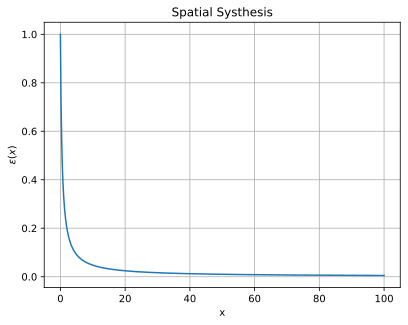

In [352]:
plt.plot(x, epsilon_x)
plt.title("Spatial Systhesis")
plt.xlabel("x")
plt.ylabel("$\epsilon(x)$")
plt.grid()